In [ ]:
!pip install torch torchvision torchxrayvision

In [2]:
import os.path as osp
import cv2
import glob
import numpy as np
import sentry_sdk
from sentry_sdk.integrations.redis import RedisIntegration
import numpy as np
import matplotlib.pyplot as plt
from lungs.app.app import db_redis
from lungs.businesslogic import model_helpers
from lungs.config import model_config, fluere_config
from lungs.net.network import load_net
import numpy as np
from lungs.data.transform import get_augmentations, get_preprocessing
from torchvision import transforms
from imageio import imread
import torch
import pandas as pd
from tqdm import tqdm
from PIL import Image
from sklearn import metrics
import torchxrayvision as xrv

In [3]:
model = xrv.models.DenseNet(weights="all")

In [4]:
model.to(model_config.device);

In [5]:
model.eval();

In [6]:
images = glob.glob("Dataset/Dataset/Origin/*")

In [7]:
transform = transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                                xrv.datasets.XRayResizer(224)])

Setting XRayResizer engine to cv2 could increase performance.


In [8]:
classes = model.pathologies

In [9]:
def get_probs(image_file, viz=False):
    image = Image.open(image_file)
    image = image.convert("RGB")
    image = np.array(image)
    img = xrv.datasets.normalize(image, 255)  

    # Check that images are 2D arrays
    if len(img.shape) > 2:
        img = img[:, :, 0]
    if len(img.shape) < 2:
        print("error, dimension lower than 2 for image")
    # Add color channel
    img = img[None, :, :]                    

    img = transform(img)
    image_tensor = torch.from_numpy(img).unsqueeze(0)
    image_tensor = image_tensor.to(model_config.device)
    with torch.no_grad():
        res = model(image_tensor)
        probs_NIH = res.detach().cpu().numpy()
    if viz:
        display(pd.DataFrame(probs_NIH, columns=classes).transpose())
        plt.imshow(image, cmap="gray")
        plt.show()
    return probs_NIH.squeeze()

  0%|          | 0/100 [00:00<?, ?it/s]

0
Atelectasis                 0.601702
Consolidation               0.531080
Infiltration                0.540291
Pneumothorax                0.509805
Edema                       0.503149
Emphysema                   0.501667
Fibrosis                    0.527584
Effusion                    0.578379
Pneumonia                   0.553653
Pleural_Thickening          0.550769
Cardiomegaly                0.119051
Nodule                      0.514719
Mass                        0.547738
Hernia                      0.012142
Lung Lesion                 0.139100
Fracture                    0.523429
Lung Opacity                0.593831
Enlarged Cardiomediastinum  0.530269

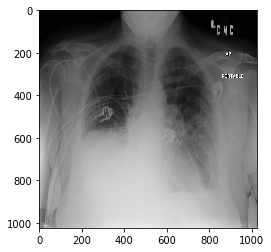

  1%|          | 1/100 [00:00<00:26,  3.76it/s]

0
Atelectasis                 0.053810
Consolidation               0.086384
Infiltration                0.530510
Pneumothorax                0.226370
Edema                       0.001251
Emphysema                   0.507218
Fibrosis                    0.504212
Effusion                    0.060457
Pneumonia                   0.004246
Pleural_Thickening          0.170055
Cardiomegaly                0.097301
Nodule                      0.468983
Mass                        0.584497
Hernia                      0.014976
Lung Lesion                 0.263935
Fracture                    0.111970
Lung Opacity                0.065350
Enlarged Cardiomediastinum  0.386314

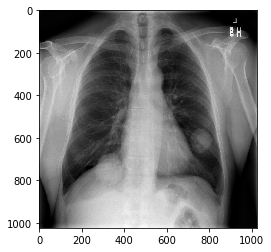

  2%|▏         | 2/100 [00:00<00:23,  4.10it/s]

0
Atelectasis                 0.612337
Consolidation               0.529613
Infiltration                0.561089
Pneumothorax                0.504462
Edema                       0.030729
Emphysema                   0.244470
Fibrosis                    0.542298
Effusion                    0.737246
Pneumonia                   0.147968
Pleural_Thickening          0.537739
Cardiomegaly                0.216223
Nodule                      0.514480
Mass                        0.527808
Hernia                      0.168721
Lung Lesion                 0.111475
Fracture                    0.501846
Lung Opacity                0.693447
Enlarged Cardiomediastinum  0.505813

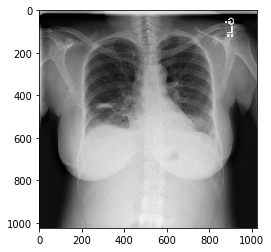

  3%|▎         | 3/100 [00:00<00:22,  4.36it/s]

0
Atelectasis                 0.648267
Consolidation               0.523385
Infiltration                0.547714
Pneumothorax                0.507168
Edema                       0.156451
Emphysema                   0.500513
Fibrosis                    0.521009
Effusion                    0.757632
Pneumonia                   0.246612
Pleural_Thickening          0.547035
Cardiomegaly                0.554882
Nodule                      0.504663
Mass                        0.516922
Hernia                      0.206065
Lung Lesion                 0.332735
Fracture                    0.520852
Lung Opacity                0.536535
Enlarged Cardiomediastinum  0.518481

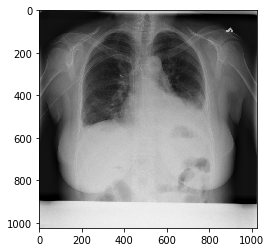

  4%|▍         | 4/100 [00:00<00:20,  4.58it/s]

0
Atelectasis                 0.067089
Consolidation               0.547722
Infiltration                0.590236
Pneumothorax                0.502332
Edema                       0.006326
Emphysema                   0.096758
Fibrosis                    0.501741
Effusion                    0.156877
Pneumonia                   0.139085
Pleural_Thickening          0.220303
Cardiomegaly                0.045301
Nodule                      0.512101
Mass                        0.519318
Hernia                      0.000402
Lung Lesion                 0.059236
Fracture                    0.126255
Lung Opacity                0.740057
Enlarged Cardiomediastinum  0.310480

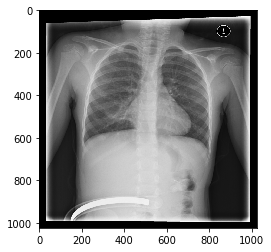

  5%|▌         | 5/100 [00:01<00:20,  4.69it/s]

0
Atelectasis                 0.521965
Consolidation               0.529568
Infiltration                0.524352
Pneumothorax                0.512559
Edema                       0.059662
Emphysema                   0.501049
Fibrosis                    0.528859
Effusion                    0.824790
Pneumonia                   0.057303
Pleural_Thickening          0.605098
Cardiomegaly                0.115308
Nodule                      0.537658
Mass                        0.566880
Hernia                      0.004018
Lung Lesion                 0.537169
Fracture                    0.481963
Lung Opacity                0.673056
Enlarged Cardiomediastinum  0.570760

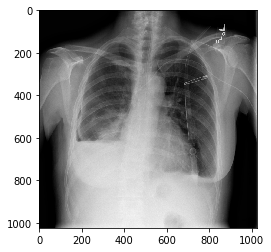

  6%|▌         | 6/100 [00:01<00:19,  4.76it/s]

0
Atelectasis                 0.515136
Consolidation               0.632253
Infiltration                0.584285
Pneumothorax                0.520003
Edema                       0.305581
Emphysema                   0.500270
Fibrosis                    0.523643
Effusion                    0.742932
Pneumonia                   0.545132
Pleural_Thickening          0.580863
Cardiomegaly                0.060624
Nodule                      0.541171
Mass                        0.738563
Hernia                      0.000397
Lung Lesion                 0.501989
Fracture                    0.365151
Lung Opacity                0.913144
Enlarged Cardiomediastinum  0.574520

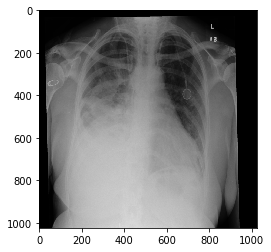

  7%|▋         | 7/100 [00:01<00:19,  4.85it/s]

0
Atelectasis                 0.564353
Consolidation               0.341715
Infiltration                0.542386
Pneumothorax                0.093684
Edema                       0.053855
Emphysema                   0.500521
Fibrosis                    0.551151
Effusion                    0.212169
Pneumonia                   0.069897
Pleural_Thickening          0.345953
Cardiomegaly                0.234700
Nodule                      0.540949
Mass                        0.540743
Hernia                      0.022586
Lung Lesion                 0.265938
Fracture                    0.485382
Lung Opacity                0.581525
Enlarged Cardiomediastinum  0.491742

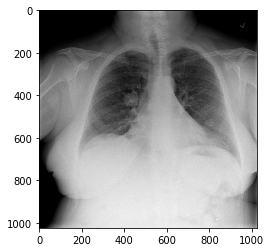

  8%|▊         | 8/100 [00:01<00:18,  4.91it/s]

0
Atelectasis                 0.508728
Consolidation               0.504861
Infiltration                0.247880
Pneumothorax                0.504692
Edema                       0.007000
Emphysema                   0.235780
Fibrosis                    0.504861
Effusion                    0.830935
Pneumonia                   0.020963
Pleural_Thickening          0.527162
Cardiomegaly                0.095955
Nodule                      0.508167
Mass                        0.538239
Hernia                      0.001457
Lung Lesion                 0.393975
Fracture                    0.213484
Lung Opacity                0.517146
Enlarged Cardiomediastinum  0.544247

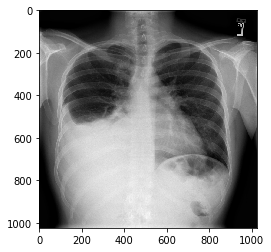

  9%|▉         | 9/100 [00:01<00:18,  4.95it/s]

0
Atelectasis                 0.106127
Consolidation               0.045462
Infiltration                0.216394
Pneumothorax                0.044981
Edema                       0.001703
Emphysema                   0.410922
Fibrosis                    0.487677
Effusion                    0.020468
Pneumonia                   0.000718
Pleural_Thickening          0.135754
Cardiomegaly                0.030725
Nodule                      0.456901
Mass                        0.302735
Hernia                      0.005226
Lung Lesion                 0.000484
Fracture                    0.185438
Lung Opacity                0.073031
Enlarged Cardiomediastinum  0.017149

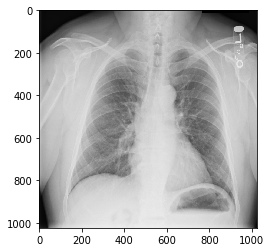

 10%|█         | 10/100 [00:02<00:17,  5.00it/s]

0
Atelectasis                 0.561786
Consolidation               0.322066
Infiltration                0.555036
Pneumothorax                0.204215
Edema                       0.011927
Emphysema                   0.500499
Fibrosis                    0.560250
Effusion                    0.270355
Pneumonia                   0.024411
Pleural_Thickening          0.504293
Cardiomegaly                0.086324
Nodule                      0.532619
Mass                        0.510828
Hernia                      0.049563
Lung Lesion                 0.165943
Fracture                    0.521425
Lung Opacity                0.629608
Enlarged Cardiomediastinum  0.282555

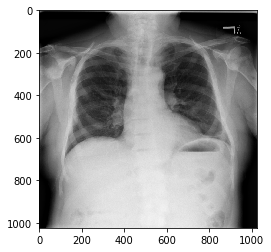

 11%|█         | 11/100 [00:02<00:17,  5.13it/s]

0
Atelectasis                 0.627157
Consolidation               0.601348
Infiltration                0.524913
Pneumothorax                0.505495
Edema                       0.117912
Emphysema                   0.501128
Fibrosis                    0.521511
Effusion                    0.797193
Pneumonia                   0.257280
Pleural_Thickening          0.502291
Cardiomegaly                0.132032
Nodule                      0.581130
Mass                        0.852758
Hernia                      0.000711
Lung Lesion                 0.869538
Fracture                    0.390914
Lung Opacity                0.702832
Enlarged Cardiomediastinum  0.848640

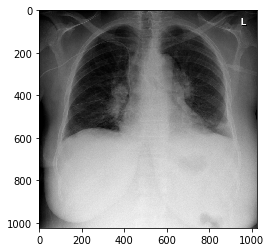

 12%|█▏        | 12/100 [00:02<00:17,  5.15it/s]

0
Atelectasis                 0.518815
Consolidation               0.532539
Infiltration                0.527926
Pneumothorax                0.512318
Edema                       0.026059
Emphysema                   0.500997
Fibrosis                    0.534294
Effusion                    0.583959
Pneumonia                   0.040291
Pleural_Thickening          0.592094
Cardiomegaly                0.005377
Nodule                      0.515734
Mass                        0.862811
Hernia                      0.006572
Lung Lesion                 0.522385
Fracture                    0.388058
Lung Opacity                0.624277
Enlarged Cardiomediastinum  0.662550

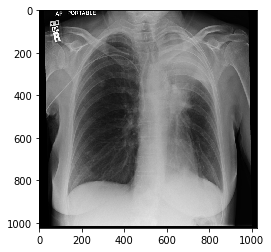

 13%|█▎        | 13/100 [00:02<00:16,  5.12it/s]

0
Atelectasis                 0.249440
Consolidation               0.546833
Infiltration                0.621598
Pneumothorax                0.507892
Edema                       0.023710
Emphysema                   0.037669
Fibrosis                    0.520486
Effusion                    0.194373
Pneumonia                   0.510749
Pleural_Thickening          0.427553
Cardiomegaly                0.020557
Nodule                      0.539058
Mass                        0.538429
Hernia                      0.005381
Lung Lesion                 0.132869
Fracture                    0.223988
Lung Opacity                0.723025
Enlarged Cardiomediastinum  0.341466

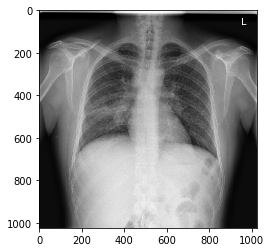

 14%|█▍        | 14/100 [00:02<00:16,  5.11it/s]

0
Atelectasis                 0.615344
Consolidation               0.534301
Infiltration                0.514602
Pneumothorax                0.508106
Edema                       0.013089
Emphysema                   0.055245
Fibrosis                    0.529955
Effusion                    0.794095
Pneumonia                   0.080247
Pleural_Thickening          0.590002
Cardiomegaly                0.019679
Nodule                      0.519492
Mass                        0.590775
Hernia                      0.008437
Lung Lesion                 0.508736
Fracture                    0.500486
Lung Opacity                0.525423
Enlarged Cardiomediastinum  0.527049

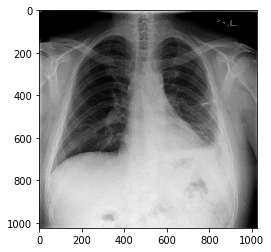

 15%|█▌        | 15/100 [00:03<00:16,  5.10it/s]

0
Atelectasis                 0.585410
Consolidation               0.549148
Infiltration                0.532581
Pneumothorax                0.500790
Edema                       0.227287
Emphysema                   0.501100
Fibrosis                    0.539199
Effusion                    0.834896
Pneumonia                   0.118791
Pleural_Thickening          0.524619
Cardiomegaly                0.652876
Nodule                      0.516530
Mass                        0.557316
Hernia                      0.030987
Lung Lesion                 0.500790
Fracture                    0.504657
Lung Opacity                0.704062
Enlarged Cardiomediastinum  0.651769

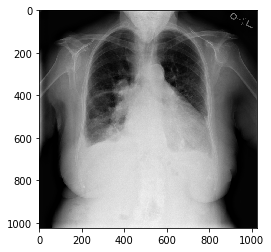

 16%|█▌        | 16/100 [00:03<00:16,  5.14it/s]

0
Atelectasis                 0.543116
Consolidation               0.532785
Infiltration                0.510349
Pneumothorax                0.514061
Edema                       0.044280
Emphysema                   0.501300
Fibrosis                    0.548369
Effusion                    0.676391
Pneumonia                   0.130255
Pleural_Thickening          0.572405
Cardiomegaly                0.082940
Nodule                      0.517308
Mass                        0.574692
Hernia                      0.098751
Lung Lesion                 0.519601
Fracture                    0.502394
Lung Opacity                0.624166
Enlarged Cardiomediastinum  0.541793

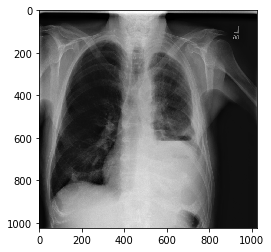

 17%|█▋        | 17/100 [00:03<00:16,  5.17it/s]

0
Atelectasis                 0.511733
Consolidation               0.330628
Infiltration                0.521418
Pneumothorax                0.503722
Edema                       0.229404
Emphysema                   0.501027
Fibrosis                    0.330449
Effusion                    0.103454
Pneumonia                   0.187438
Pleural_Thickening          0.132321
Cardiomegaly                0.062775
Nodule                      0.533921
Mass                        0.554040
Hernia                      0.005806
Lung Lesion                 0.058524
Fracture                    0.518534
Lung Opacity                0.625954
Enlarged Cardiomediastinum  0.524027

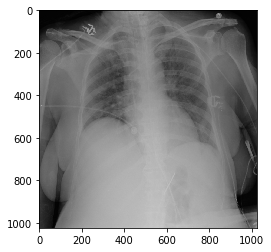

 18%|█▊        | 18/100 [00:03<00:15,  5.13it/s]

0
Atelectasis                 0.530612
Consolidation               0.539276
Infiltration                0.516245
Pneumothorax                0.507612
Edema                       0.019072
Emphysema                   0.248437
Fibrosis                    0.550010
Effusion                    0.569969
Pneumonia                   0.160200
Pleural_Thickening          0.559894
Cardiomegaly                0.014872
Nodule                      0.516936
Mass                        0.638140
Hernia                      0.016583
Lung Lesion                 0.303359
Fracture                    0.501756
Lung Opacity                0.665742
Enlarged Cardiomediastinum  0.538249

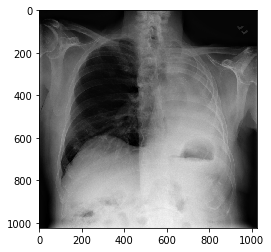

 19%|█▉        | 19/100 [00:03<00:15,  5.14it/s]

0
Atelectasis                 0.439831
Consolidation               0.545611
Infiltration                0.554932
Pneumothorax                0.508306
Edema                       0.099827
Emphysema                   0.500774
Fibrosis                    0.504468
Effusion                    0.266507
Pneumonia                   0.174787
Pleural_Thickening          0.514065
Cardiomegaly                0.033882
Nodule                      0.539987
Mass                        0.831365
Hernia                      0.006137
Lung Lesion                 0.253568
Fracture                    0.345402
Lung Opacity                0.619807
Enlarged Cardiomediastinum  0.546450

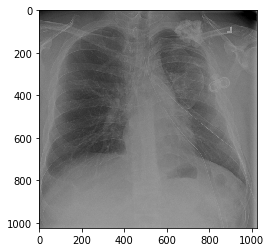

 20%|██        | 20/100 [00:03<00:15,  5.13it/s]

0
Atelectasis                 0.199650
Consolidation               0.498499
Infiltration                0.509373
Pneumothorax                0.420382
Edema                       0.000819
Emphysema                   0.354087
Fibrosis                    0.500087
Effusion                    0.197917
Pneumonia                   0.000405
Pleural_Thickening          0.186462
Cardiomegaly                0.037260
Nodule                      0.529878
Mass                        0.763941
Hernia                      0.027107
Lung Lesion                 0.058942
Fracture                    0.294057
Lung Opacity                0.656973
Enlarged Cardiomediastinum  0.297319

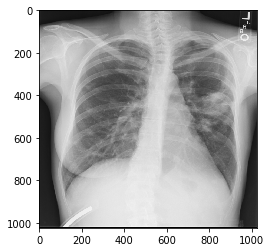

 21%|██        | 21/100 [00:04<00:15,  5.16it/s]

0
Atelectasis                 0.562514
Consolidation               0.514166
Infiltration                0.572812
Pneumothorax                0.511254
Edema                       0.058440
Emphysema                   0.500159
Fibrosis                    0.528858
Effusion                    0.541927
Pneumonia                   0.243587
Pleural_Thickening          0.566290
Cardiomegaly                0.010337
Nodule                      0.514310
Mass                        0.530999
Hernia                      0.046000
Lung Lesion                 0.059932
Fracture                    0.516859
Lung Opacity                0.513414
Enlarged Cardiomediastinum  0.287554

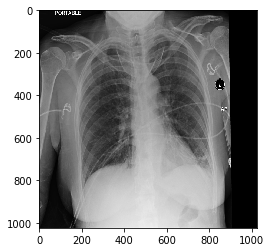

 22%|██▏       | 22/100 [00:04<00:15,  5.17it/s]

0
Atelectasis                 0.500443
Consolidation               0.545696
Infiltration                0.564329
Pneumothorax                0.515367
Edema                       0.166425
Emphysema                   0.503561
Fibrosis                    0.513169
Effusion                    0.532189
Pneumonia                   0.089168
Pleural_Thickening          0.505718
Cardiomegaly                0.076907
Nodule                      0.516084
Mass                        0.850805
Hernia                      0.005978
Lung Lesion                 0.049951
Fracture                    0.179631
Lung Opacity                0.919731
Enlarged Cardiomediastinum  0.619405

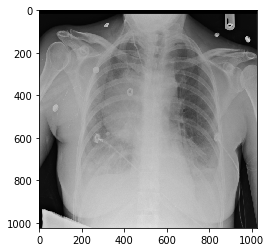

 23%|██▎       | 23/100 [00:04<00:14,  5.14it/s]

0
Atelectasis                 0.041571
Consolidation               0.046152
Infiltration                0.174855
Pneumothorax                0.112872
Edema                       0.001120
Emphysema                   0.307152
Fibrosis                    0.500040
Effusion                    0.015174
Pneumonia                   0.000493
Pleural_Thickening          0.183478
Cardiomegaly                0.013631
Nodule                      0.367426
Mass                        0.217226
Hernia                      0.011668
Lung Lesion                 0.000507
Fracture                    0.128276
Lung Opacity                0.097531
Enlarged Cardiomediastinum  0.020551

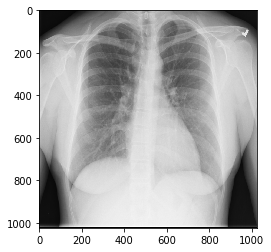

 24%|██▍       | 24/100 [00:04<00:14,  5.11it/s]

0
Atelectasis                 0.549886
Consolidation               0.565280
Infiltration                0.563299
Pneumothorax                0.517169
Edema                       0.102118
Emphysema                   0.501188
Fibrosis                    0.512453
Effusion                    0.598289
Pneumonia                   0.139467
Pleural_Thickening          0.526420
Cardiomegaly                0.295761
Nodule                      0.505820
Mass                        0.746619
Hernia                      0.051448
Lung Lesion                 0.065463
Fracture                    0.387762
Lung Opacity                0.868617
Enlarged Cardiomediastinum  0.625097

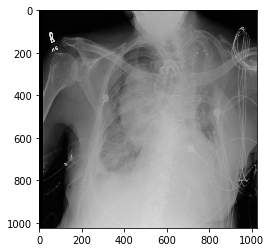

 25%|██▌       | 25/100 [00:04<00:14,  5.08it/s]

0
Atelectasis                 0.635574
Consolidation               0.550984
Infiltration                0.514860
Pneumothorax                0.520970
Edema                       0.026463
Emphysema                   0.128357
Fibrosis                    0.514186
Effusion                    0.850882
Pneumonia                   0.092250
Pleural_Thickening          0.587309
Cardiomegaly                0.033406
Nodule                      0.506081
Mass                        0.548494
Hernia                      0.005239
Lung Lesion                 0.508657
Fracture                    0.502727
Lung Opacity                0.620721
Enlarged Cardiomediastinum  0.552023

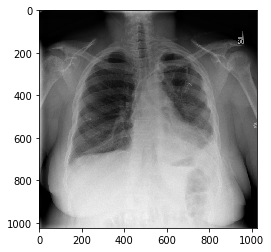

 26%|██▌       | 26/100 [00:05<00:16,  4.59it/s]

0
Atelectasis                 0.593862
Consolidation               0.505619
Infiltration                0.550267
Pneumothorax                0.214249
Edema                       0.030171
Emphysema                   0.389649
Fibrosis                    0.576933
Effusion                    0.460502
Pneumonia                   0.108471
Pleural_Thickening          0.525289
Cardiomegaly                0.281148
Nodule                      0.525164
Mass                        0.533152
Hernia                      0.500192
Lung Lesion                 0.120308
Fracture                    0.526842
Lung Opacity                0.657349
Enlarged Cardiomediastinum  0.506289

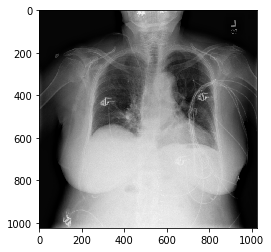

 27%|██▋       | 27/100 [00:05<00:15,  4.74it/s]

0
Atelectasis                 0.516779
Consolidation               0.524193
Infiltration                0.569534
Pneumothorax                0.473558
Edema                       0.026353
Emphysema                   0.500938
Fibrosis                    0.590228
Effusion                    0.360630
Pneumonia                   0.050978
Pleural_Thickening          0.519684
Cardiomegaly                0.131176
Nodule                      0.668236
Mass                        0.588578
Hernia                      0.011911
Lung Lesion                 0.578885
Fracture                    0.517457
Lung Opacity                0.807582
Enlarged Cardiomediastinum  0.539115

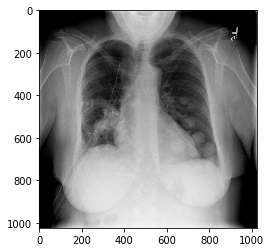

 28%|██▊       | 28/100 [00:05<00:14,  4.81it/s]

0
Atelectasis                 0.133021
Consolidation               0.411717
Infiltration                0.518097
Pneumothorax                0.500517
Edema                       0.003664
Emphysema                   0.501865
Fibrosis                    0.503427
Effusion                    0.175706
Pneumonia                   0.000919
Pleural_Thickening          0.165116
Cardiomegaly                0.043803
Nodule                      0.657562
Mass                        0.872633
Hernia                      0.009861
Lung Lesion                 0.587464
Fracture                    0.355488
Lung Opacity                0.654979
Enlarged Cardiomediastinum  0.555069

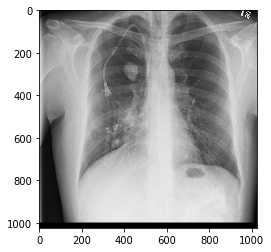

 29%|██▉       | 29/100 [00:05<00:14,  4.84it/s]

0
Atelectasis                 0.548445
Consolidation               0.505177
Infiltration                0.511376
Pneumothorax                0.504130
Edema                       0.006491
Emphysema                   0.487149
Fibrosis                    0.544470
Effusion                    0.687583
Pneumonia                   0.034923
Pleural_Thickening          0.576857
Cardiomegaly                0.044723
Nodule                      0.514335
Mass                        0.549938
Hernia                      0.025795
Lung Lesion                 0.127289
Fracture                    0.501248
Lung Opacity                0.481984
Enlarged Cardiomediastinum  0.476328

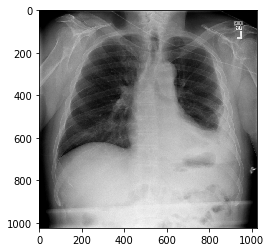

 30%|███       | 30/100 [00:06<00:14,  4.94it/s]

0
Atelectasis                 0.552265
Consolidation               0.523399
Infiltration                0.547897
Pneumothorax                0.522165
Edema                       0.025940
Emphysema                   0.500237
Fibrosis                    0.548724
Effusion                    0.563271
Pneumonia                   0.149212
Pleural_Thickening          0.561755
Cardiomegaly                0.128898
Nodule                      0.513206
Mass                        0.563425
Hernia                      0.054137
Lung Lesion                 0.291226
Fracture                    0.509644
Lung Opacity                0.559225
Enlarged Cardiomediastinum  0.524706

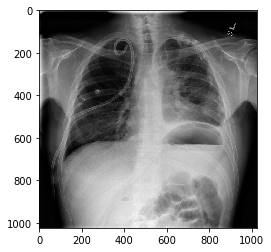

 31%|███       | 31/100 [00:06<00:13,  5.06it/s]

0
Atelectasis                 0.521994
Consolidation               0.500370
Infiltration                0.501893
Pneumothorax                0.508666
Edema                       0.038081
Emphysema                   0.504995
Fibrosis                    0.557159
Effusion                    0.726589
Pneumonia                   0.017617
Pleural_Thickening          0.591999
Cardiomegaly                0.106049
Nodule                      0.569693
Mass                        0.606506
Hernia                      0.019585
Lung Lesion                 0.419664
Fracture                    0.515349
Lung Opacity                0.581628
Enlarged Cardiomediastinum  0.525500

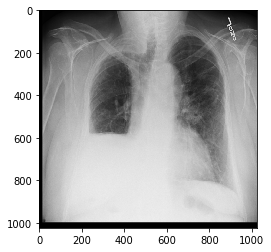

 32%|███▏      | 32/100 [00:06<00:13,  5.12it/s]

0
Atelectasis                 0.553519
Consolidation               0.521533
Infiltration                0.537990
Pneumothorax                0.501739
Edema                       0.351927
Emphysema                   0.501656
Fibrosis                    0.532819
Effusion                    0.833941
Pneumonia                   0.259693
Pleural_Thickening          0.540358
Cardiomegaly                0.657678
Nodule                      0.504963
Mass                        0.503807
Hernia                      0.005914
Lung Lesion                 0.504368
Fracture                    0.500598
Lung Opacity                0.628140
Enlarged Cardiomediastinum  0.603862

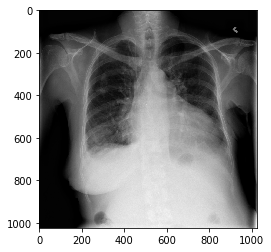

 33%|███▎      | 33/100 [00:06<00:13,  5.07it/s]

0
Atelectasis                 0.283700
Consolidation               0.507565
Infiltration                0.516281
Pneumothorax                0.501912
Edema                       0.007084
Emphysema                   0.091196
Fibrosis                    0.505024
Effusion                    0.755011
Pneumonia                   0.017771
Pleural_Thickening          0.513847
Cardiomegaly                0.010642
Nodule                      0.616272
Mass                        0.665408
Hernia                      0.001292
Lung Lesion                 0.628738
Fracture                    0.194150
Lung Opacity                0.584463
Enlarged Cardiomediastinum  0.567827

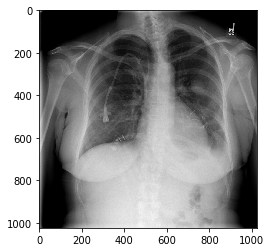

 34%|███▍      | 34/100 [00:06<00:13,  5.00it/s]

0
Atelectasis                 0.147175
Consolidation               0.521660
Infiltration                0.662064
Pneumothorax                0.500745
Edema                       0.041479
Emphysema                   0.502160
Fibrosis                    0.661397
Effusion                    0.106009
Pneumonia                   0.491735
Pleural_Thickening          0.528170
Cardiomegaly                0.098070
Nodule                      0.618674
Mass                        0.513945
Hernia                      0.013538
Lung Lesion                 0.526879
Fracture                    0.297828
Lung Opacity                0.782719
Enlarged Cardiomediastinum  0.519728

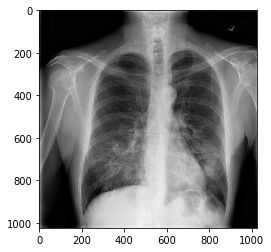

 35%|███▌      | 35/100 [00:06<00:13,  4.98it/s]

0
Atelectasis                 0.033081
Consolidation               0.138909
Infiltration                0.508609
Pneumothorax                0.489142
Edema                       0.000701
Emphysema                   0.256074
Fibrosis                    0.510525
Effusion                    0.036644
Pneumonia                   0.030875
Pleural_Thickening          0.506859
Cardiomegaly                0.000951
Nodule                      0.402331
Mass                        0.128442
Hernia                      0.067822
Lung Lesion                 0.025889
Fracture                    0.112662
Lung Opacity                0.043098
Enlarged Cardiomediastinum  0.023254

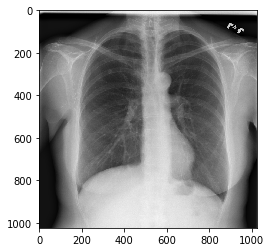

 36%|███▌      | 36/100 [00:07<00:12,  5.02it/s]

0
Atelectasis                 0.433752
Consolidation               0.523912
Infiltration                0.542770
Pneumothorax                0.503887
Edema                       0.067849
Emphysema                   0.500120
Fibrosis                    0.512385
Effusion                    0.420202
Pneumonia                   0.003097
Pleural_Thickening          0.504506
Cardiomegaly                0.293570
Nodule                      0.636449
Mass                        0.862551
Hernia                      0.039569
Lung Lesion                 0.555371
Fracture                    0.524954
Lung Opacity                0.749900
Enlarged Cardiomediastinum  0.552764

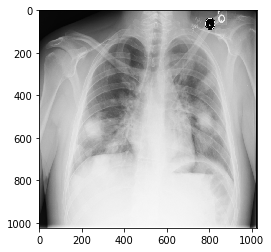

 37%|███▋      | 37/100 [00:07<00:12,  5.00it/s]

0
Atelectasis                 0.504465
Consolidation               0.520978
Infiltration                0.639730
Pneumothorax                0.502758
Edema                       0.154684
Emphysema                   0.500149
Fibrosis                    0.579577
Effusion                    0.247906
Pneumonia                   0.514405
Pleural_Thickening          0.519483
Cardiomegaly                0.247690
Nodule                      0.524093
Mass                        0.547256
Hernia                      0.025239
Lung Lesion                 0.125933
Fracture                    0.438602
Lung Opacity                0.694112
Enlarged Cardiomediastinum  0.530890

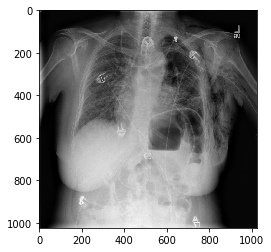

 38%|███▊      | 38/100 [00:07<00:12,  4.99it/s]

0
Atelectasis                 0.221696
Consolidation               0.359842
Infiltration                0.530648
Pneumothorax                0.199094
Edema                       0.013629
Emphysema                   0.500654
Fibrosis                    0.515438
Effusion                    0.213375
Pneumonia                   0.003144
Pleural_Thickening          0.176920
Cardiomegaly                0.037889
Nodule                      0.587110
Mass                        0.583525
Hernia                      0.004617
Lung Lesion                 0.029530
Fracture                    0.480295
Lung Opacity                0.784610
Enlarged Cardiomediastinum  0.153346

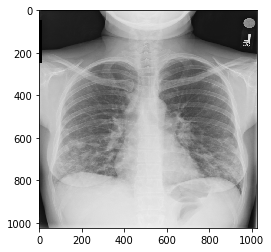

 39%|███▉      | 39/100 [00:07<00:12,  4.98it/s]

0
Atelectasis                 0.526499
Consolidation               0.520247
Infiltration                0.504490
Pneumothorax                0.512012
Edema                       0.022262
Emphysema                   0.500549
Fibrosis                    0.516690
Effusion                    0.550668
Pneumonia                   0.080349
Pleural_Thickening          0.517648
Cardiomegaly                0.018138
Nodule                      0.515508
Mass                        0.661736
Hernia                      0.012717
Lung Lesion                 0.007662
Fracture                    0.514844
Lung Opacity                0.825620
Enlarged Cardiomediastinum  0.510667

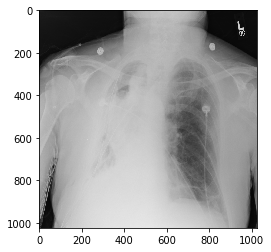

 40%|████      | 40/100 [00:07<00:11,  5.03it/s]

0
Atelectasis                 0.614384
Consolidation               0.505518
Infiltration                0.534019
Pneumothorax                0.394330
Edema                       0.167954
Emphysema                   0.483132
Fibrosis                    0.536649
Effusion                    0.585138
Pneumonia                   0.072315
Pleural_Thickening          0.526340
Cardiomegaly                0.538605
Nodule                      0.505197
Mass                        0.553546
Hernia                      0.649460
Lung Lesion                 0.134136
Fracture                    0.506959
Lung Opacity                0.564704
Enlarged Cardiomediastinum  0.502998

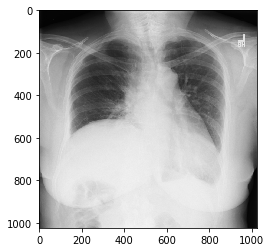

 41%|████      | 41/100 [00:08<00:11,  5.11it/s]

0
Atelectasis                 0.004513
Consolidation               0.022370
Infiltration                0.517972
Pneumothorax                0.060865
Edema                       0.003340
Emphysema                   0.045139
Fibrosis                    0.133005
Effusion                    0.014662
Pneumonia                   0.003977
Pleural_Thickening          0.067800
Cardiomegaly                0.035000
Nodule                      0.107092
Mass                        0.026308
Hernia                      0.000207
Lung Lesion                 0.015769
Fracture                    0.057693
Lung Opacity                0.010318
Enlarged Cardiomediastinum  0.033185

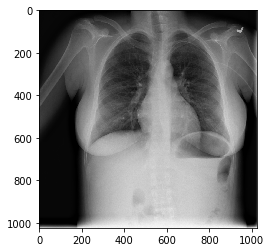

 42%|████▏     | 42/100 [00:08<00:11,  5.14it/s]

0
Atelectasis                 0.566052
Consolidation               0.535990
Infiltration                0.522521
Pneumothorax                0.517066
Edema                       0.106546
Emphysema                   0.502325
Fibrosis                    0.507094
Effusion                    0.567209
Pneumonia                   0.239452
Pleural_Thickening          0.507377
Cardiomegaly                0.162137
Nodule                      0.509663
Mass                        0.648158
Hernia                      0.075620
Lung Lesion                 0.010433
Fracture                    0.509389
Lung Opacity                0.858520
Enlarged Cardiomediastinum  0.544709

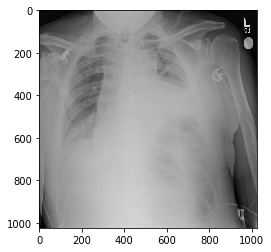

 43%|████▎     | 43/100 [00:08<00:11,  5.14it/s]

0
Atelectasis                 0.541185
Consolidation               0.362103
Infiltration                0.431291
Pneumothorax                0.503205
Edema                       0.051760
Emphysema                   0.500411
Fibrosis                    0.221667
Effusion                    0.251821
Pneumonia                   0.224076
Pleural_Thickening          0.286914
Cardiomegaly                0.110375
Nodule                      0.488695
Mass                        0.476543
Hernia                      0.016024
Lung Lesion                 0.011292
Fracture                    0.520198
Lung Opacity                0.321414
Enlarged Cardiomediastinum  0.118082

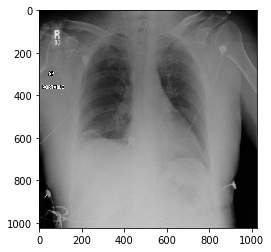

 44%|████▍     | 44/100 [00:08<00:10,  5.11it/s]

0
Atelectasis                 0.093149
Consolidation               0.115017
Infiltration                0.268089
Pneumothorax                0.108052
Edema                       0.002706
Emphysema                   0.170302
Fibrosis                    0.380420
Effusion                    0.019695
Pneumonia                   0.000917
Pleural_Thickening          0.144601
Cardiomegaly                0.010482
Nodule                      0.500651
Mass                        0.506217
Hernia                      0.007399
Lung Lesion                 0.003275
Fracture                    0.336634
Lung Opacity                0.273692
Enlarged Cardiomediastinum  0.056816

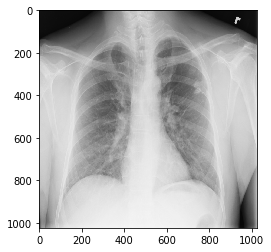

 45%|████▌     | 45/100 [00:08<00:10,  5.09it/s]

0
Atelectasis                 0.530205
Consolidation               0.500807
Infiltration                0.429432
Pneumothorax                0.519748
Edema                       0.005723
Emphysema                   0.500609
Fibrosis                    0.503646
Effusion                    0.859671
Pneumonia                   0.101755
Pleural_Thickening          0.557677
Cardiomegaly                0.045507
Nodule                      0.502675
Mass                        0.378539
Hernia                      0.004366
Lung Lesion                 0.140037
Fracture                    0.445787
Lung Opacity                0.283750
Enlarged Cardiomediastinum  0.508936

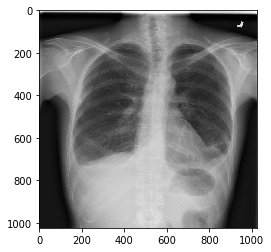

 46%|████▌     | 46/100 [00:09<00:10,  5.11it/s]

0
Atelectasis                 0.224113
Consolidation               0.500774
Infiltration                0.550153
Pneumothorax                0.203511
Edema                       0.018144
Emphysema                   0.500061
Fibrosis                    0.559515
Effusion                    0.089890
Pneumonia                   0.034331
Pleural_Thickening          0.503321
Cardiomegaly                0.079084
Nodule                      0.739841
Mass                        0.622448
Hernia                      0.005066
Lung Lesion                 0.556761
Fracture                    0.510255
Lung Opacity                0.645272
Enlarged Cardiomediastinum  0.544130

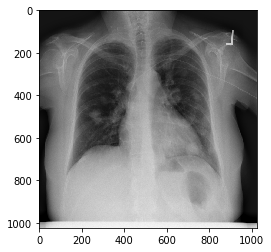

 47%|████▋     | 47/100 [00:09<00:10,  5.13it/s]

0
Atelectasis                 0.508715
Consolidation               0.597413
Infiltration                0.665959
Pneumothorax                0.506032
Edema                       0.510229
Emphysema                   0.501309
Fibrosis                    0.565946
Effusion                    0.590842
Pneumonia                   0.582367
Pleural_Thickening          0.541007
Cardiomegaly                0.550476
Nodule                      0.540562
Mass                        0.632011
Hernia                      0.014702
Lung Lesion                 0.349537
Fracture                    0.256622
Lung Opacity                0.933893
Enlarged Cardiomediastinum  0.647446

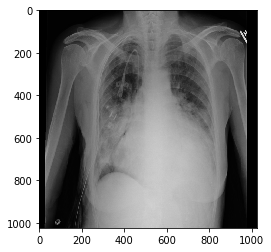

 48%|████▊     | 48/100 [00:09<00:10,  5.11it/s]

0
Atelectasis                 0.554531
Consolidation               0.519310
Infiltration                0.539819
Pneumothorax                0.502333
Edema                       0.153098
Emphysema                   0.505956
Fibrosis                    0.582552
Effusion                    0.686452
Pneumonia                   0.117591
Pleural_Thickening          0.605485
Cardiomegaly                0.579502
Nodule                      0.516664
Mass                        0.533135
Hernia                      0.031625
Lung Lesion                 0.210986
Fracture                    0.520788
Lung Opacity                0.629771
Enlarged Cardiomediastinum  0.549270

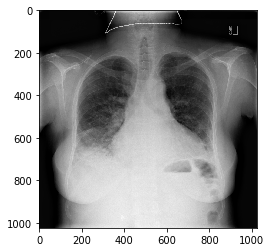

 49%|████▉     | 49/100 [00:09<00:10,  5.09it/s]

0
Atelectasis                 0.589262
Consolidation               0.521050
Infiltration                0.521566
Pneumothorax                0.501084
Edema                       0.477002
Emphysema                   0.500172
Fibrosis                    0.398946
Effusion                    0.529114
Pneumonia                   0.534729
Pleural_Thickening          0.488446
Cardiomegaly                0.368235
Nodule                      0.279732
Mass                        0.502338
Hernia                      0.052670
Lung Lesion                 0.010700
Fracture                    0.501621
Lung Opacity                0.609752
Enlarged Cardiomediastinum  0.510579

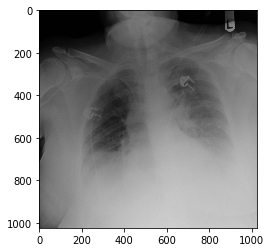

 50%|█████     | 50/100 [00:10<00:10,  4.60it/s]

0
Atelectasis                 0.552664
Consolidation               0.501438
Infiltration                0.509256
Pneumothorax                0.500559
Edema                       0.052571
Emphysema                   0.500174
Fibrosis                    0.491116
Effusion                    0.513772
Pneumonia                   0.238394
Pleural_Thickening          0.450731
Cardiomegaly                0.132001
Nodule                      0.459386
Mass                        0.522146
Hernia                      0.064363
Lung Lesion                 0.001863
Fracture                    0.503252
Lung Opacity                0.719142
Enlarged Cardiomediastinum  0.384547

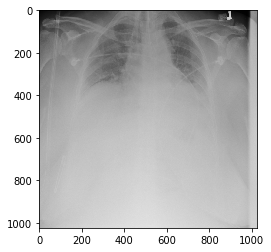

 51%|█████     | 51/100 [00:10<00:10,  4.78it/s]

0
Atelectasis                 0.068566
Consolidation               0.188933
Infiltration                0.415449
Pneumothorax                0.218704
Edema                       0.004060
Emphysema                   0.505926
Fibrosis                    0.334991
Effusion                    0.143174
Pneumonia                   0.001436
Pleural_Thickening          0.037586
Cardiomegaly                0.078036
Nodule                      0.793084
Mass                        0.884932
Hernia                      0.015395
Lung Lesion                 0.805778
Fracture                    0.494609
Lung Opacity                0.563348
Enlarged Cardiomediastinum  0.645771

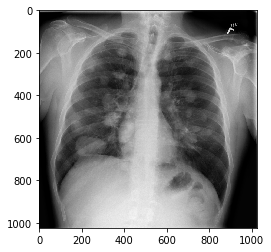

 52%|█████▏    | 52/100 [00:10<00:09,  4.89it/s]

0
Atelectasis                 0.246989
Consolidation               0.510693
Infiltration                0.525368
Pneumothorax                0.345552
Edema                       0.002276
Emphysema                   0.502013
Fibrosis                    0.501037
Effusion                    0.105917
Pneumonia                   0.002171
Pleural_Thickening          0.159401
Cardiomegaly                0.080190
Nodule                      0.600499
Mass                        0.887339
Hernia                      0.022804
Lung Lesion                 0.503453
Fracture                    0.504749
Lung Opacity                0.669924
Enlarged Cardiomediastinum  0.532139

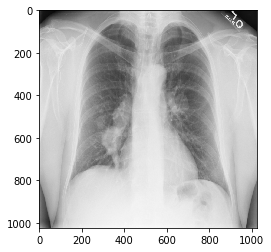

 53%|█████▎    | 53/100 [00:10<00:09,  4.91it/s]

0
Atelectasis                 0.531212
Consolidation               0.511989
Infiltration                0.544709
Pneumothorax                0.510451
Edema                       0.039645
Emphysema                   0.555125
Fibrosis                    0.535482
Effusion                    0.560529
Pneumonia                   0.013607
Pleural_Thickening          0.413715
Cardiomegaly                0.376898
Nodule                      0.605013
Mass                        0.853795
Hernia                      0.026371
Lung Lesion                 0.769280
Fracture                    0.503754
Lung Opacity                0.731790
Enlarged Cardiomediastinum  0.707916

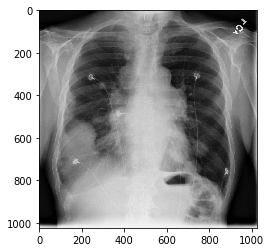

 54%|█████▍    | 54/100 [00:10<00:09,  4.95it/s]

0
Atelectasis                 0.251471
Consolidation               0.094601
Infiltration                0.521065
Pneumothorax                0.062046
Edema                       0.005100
Emphysema                   0.144223
Fibrosis                    0.506051
Effusion                    0.088201
Pneumonia                   0.012833
Pleural_Thickening          0.512585
Cardiomegaly                0.114764
Nodule                      0.520433
Mass                        0.669543
Hernia                      0.993073
Lung Lesion                 0.172356
Fracture                    0.504893
Lung Opacity                0.535725
Enlarged Cardiomediastinum  0.508010

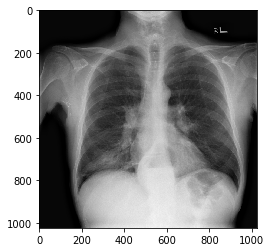

 55%|█████▌    | 55/100 [00:10<00:09,  4.99it/s]

0
Atelectasis                 0.088949
Consolidation               0.274312
Infiltration                0.520777
Pneumothorax                0.504595
Edema                       0.002200
Emphysema                   0.502789
Fibrosis                    0.538857
Effusion                    0.148850
Pneumonia                   0.013875
Pleural_Thickening          0.520065
Cardiomegaly                0.020089
Nodule                      0.575625
Mass                        0.639470
Hernia                      0.046741
Lung Lesion                 0.130640
Fracture                    0.265714
Lung Opacity                0.529688
Enlarged Cardiomediastinum  0.311272

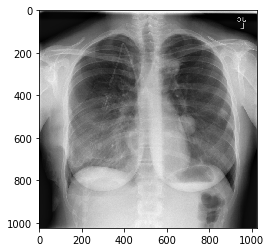

 56%|█████▌    | 56/100 [00:11<00:08,  4.99it/s]

0
Atelectasis                 0.566039
Consolidation               0.556186
Infiltration                0.533908
Pneumothorax                0.514207
Edema                       0.179647
Emphysema                   0.504660
Fibrosis                    0.522669
Effusion                    0.781323
Pneumonia                   0.024295
Pleural_Thickening          0.551746
Cardiomegaly                0.262427
Nodule                      0.535339
Mass                        0.644197
Hernia                      0.019395
Lung Lesion                 0.139845
Fracture                    0.536875
Lung Opacity                0.824742
Enlarged Cardiomediastinum  0.521343

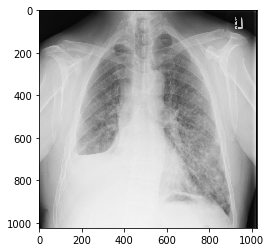

 57%|█████▋    | 57/100 [00:11<00:08,  4.99it/s]

0
Atelectasis                 0.416450
Consolidation               0.514688
Infiltration                0.561731
Pneumothorax                0.505273
Edema                       0.017455
Emphysema                   0.507507
Fibrosis                    0.517429
Effusion                    0.443983
Pneumonia                   0.014524
Pleural_Thickening          0.511966
Cardiomegaly                0.151778
Nodule                      0.508567
Mass                        0.858852
Hernia                      0.014321
Lung Lesion                 0.582923
Fracture                    0.393284
Lung Opacity                0.590186
Enlarged Cardiomediastinum  0.715860

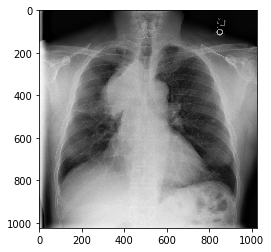

 58%|█████▊    | 58/100 [00:11<00:08,  5.01it/s]

0
Atelectasis                 0.079356
Consolidation               0.087939
Infiltration                0.542259
Pneumothorax                0.103271
Edema                       0.011641
Emphysema                   0.500162
Fibrosis                    0.504854
Effusion                    0.062940
Pneumonia                   0.011441
Pleural_Thickening          0.317619
Cardiomegaly                0.201813
Nodule                      0.401981
Mass                        0.261496
Hernia                      0.007954
Lung Lesion                 0.082004
Fracture                    0.249868
Lung Opacity                0.082301
Enlarged Cardiomediastinum  0.143643

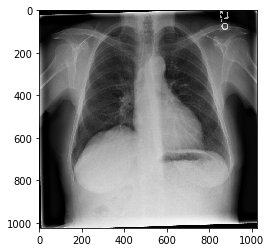

 59%|█████▉    | 59/100 [00:11<00:08,  5.01it/s]

0
Atelectasis                 0.227988
Consolidation               0.568643
Infiltration                0.587654
Pneumothorax                0.514714
Edema                       0.087206
Emphysema                   0.500407
Fibrosis                    0.536144
Effusion                    0.426911
Pneumonia                   0.249375
Pleural_Thickening          0.507903
Cardiomegaly                0.019269
Nodule                      0.572674
Mass                        0.804634
Hernia                      0.000114
Lung Lesion                 0.099524
Fracture                    0.245687
Lung Opacity                0.969296
Enlarged Cardiomediastinum  0.540665

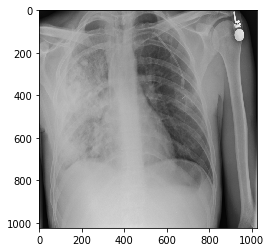

 60%|██████    | 60/100 [00:11<00:07,  5.01it/s]

0
Atelectasis                 0.518436
Consolidation               0.515292
Infiltration                0.537243
Pneumothorax                0.512101
Edema                       0.036965
Emphysema                   0.503142
Fibrosis                    0.571839
Effusion                    0.545841
Pneumonia                   0.021144
Pleural_Thickening          0.550783
Cardiomegaly                0.192570
Nodule                      0.529720
Mass                        0.783277
Hernia                      0.031046
Lung Lesion                 0.451364
Fracture                    0.506539
Lung Opacity                0.636694
Enlarged Cardiomediastinum  0.558646

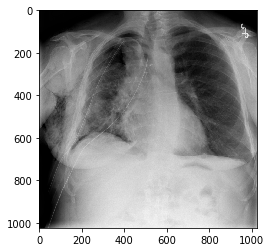

 61%|██████    | 61/100 [00:12<00:07,  5.08it/s]

0
Atelectasis                 0.519605
Consolidation               0.524744
Infiltration                0.520514
Pneumothorax                0.513995
Edema                       0.015154
Emphysema                   0.501418
Fibrosis                    0.550099
Effusion                    0.523748
Pneumonia                   0.035373
Pleural_Thickening          0.556787
Cardiomegaly                0.050228
Nodule                      0.511809
Mass                        0.775375
Hernia                      0.012297
Lung Lesion                 0.507812
Fracture                    0.453888
Lung Opacity                0.596175
Enlarged Cardiomediastinum  0.637215

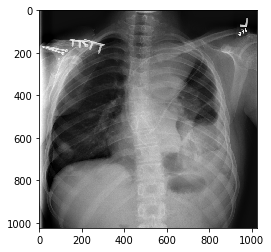

 62%|██████▏   | 62/100 [00:12<00:07,  5.07it/s]

0
Atelectasis                 0.136750
Consolidation               0.395960
Infiltration                0.525926
Pneumothorax                0.500862
Edema                       0.007789
Emphysema                   0.504728
Fibrosis                    0.534011
Effusion                    0.128951
Pneumonia                   0.038149
Pleural_Thickening          0.423871
Cardiomegaly                0.022217
Nodule                      0.576886
Mass                        0.637323
Hernia                      0.005950
Lung Lesion                 0.535374
Fracture                    0.418684
Lung Opacity                0.563991
Enlarged Cardiomediastinum  0.548320

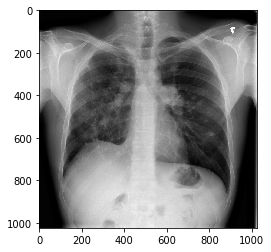

 63%|██████▎   | 63/100 [00:12<00:07,  4.98it/s]

0
Atelectasis                 0.169023
Consolidation               0.064257
Infiltration                0.527653
Pneumothorax                0.092728
Edema                       0.005368
Emphysema                   0.079095
Fibrosis                    0.502654
Effusion                    0.037838
Pneumonia                   0.008445
Pleural_Thickening          0.170098
Cardiomegaly                0.024671
Nodule                      0.290118
Mass                        0.123219
Hernia                      0.002145
Lung Lesion                 0.025280
Fracture                    0.121302
Lung Opacity                0.085181
Enlarged Cardiomediastinum  0.053128

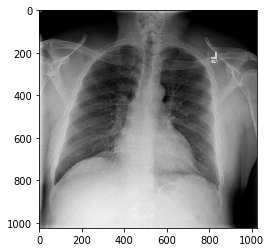

 64%|██████▍   | 64/100 [00:12<00:07,  4.96it/s]

0
Atelectasis                 0.607930
Consolidation               0.581065
Infiltration                0.524826
Pneumothorax                0.514426
Edema                       0.273074
Emphysema                   0.500969
Fibrosis                    0.505460
Effusion                    0.898136
Pneumonia                   0.067523
Pleural_Thickening          0.541587
Cardiomegaly                0.459607
Nodule                      0.544394
Mass                        0.603634
Hernia                      0.006481
Lung Lesion                 0.574858
Fracture                    0.517928
Lung Opacity                0.766075
Enlarged Cardiomediastinum  0.558779

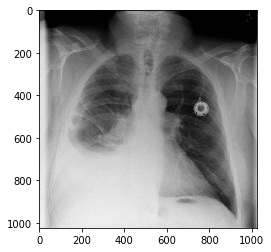

 65%|██████▌   | 65/100 [00:12<00:07,  4.99it/s]

0
Atelectasis                 0.258270
Consolidation               0.317388
Infiltration                0.494227
Pneumothorax                0.501464
Edema                       0.001145
Emphysema                   0.500065
Fibrosis                    0.538806
Effusion                    0.185685
Pneumonia                   0.002751
Pleural_Thickening          0.503392
Cardiomegaly                0.002608
Nodule                      0.540909
Mass                        0.554916
Hernia                      0.010287
Lung Lesion                 0.005750
Fracture                    0.389775
Lung Opacity                0.585519
Enlarged Cardiomediastinum  0.071744

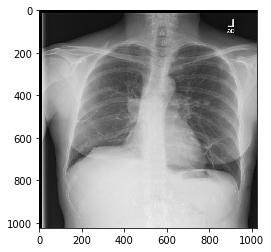

 66%|██████▌   | 66/100 [00:13<00:06,  4.98it/s]

0
Atelectasis                 0.239041
Consolidation               0.103338
Infiltration                0.468005
Pneumothorax                0.166674
Edema                       0.003623
Emphysema                   0.452949
Fibrosis                    0.513865
Effusion                    0.109259
Pneumonia                   0.001427
Pleural_Thickening          0.338196
Cardiomegaly                0.014267
Nodule                      0.490386
Mass                        0.501307
Hernia                      0.002230
Lung Lesion                 0.011073
Fracture                    0.169624
Lung Opacity                0.409213
Enlarged Cardiomediastinum  0.061256

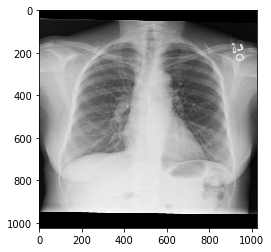

 67%|██████▋   | 67/100 [00:13<00:06,  4.99it/s]

0
Atelectasis                 0.334140
Consolidation               0.307377
Infiltration                0.577459
Pneumothorax                0.400272
Edema                       0.165121
Emphysema                   0.500160
Fibrosis                    0.536773
Effusion                    0.191461
Pneumonia                   0.120520
Pleural_Thickening          0.512671
Cardiomegaly                0.517773
Nodule                      0.515672
Mass                        0.493948
Hernia                      0.016470
Lung Lesion                 0.234478
Fracture                    0.442623
Lung Opacity                0.482156
Enlarged Cardiomediastinum  0.465663

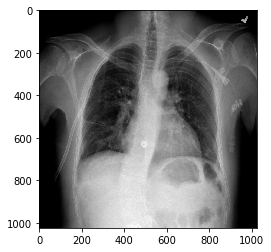

 68%|██████▊   | 68/100 [00:13<00:06,  5.01it/s]

0
Atelectasis                 0.115100
Consolidation               0.078572
Infiltration                0.518648
Pneumothorax                0.172378
Edema                       0.031942
Emphysema                   0.153540
Fibrosis                    0.265445
Effusion                    0.237672
Pneumonia                   0.010882
Pleural_Thickening          0.104543
Cardiomegaly                0.552438
Nodule                      0.127031
Mass                        0.064232
Hernia                      0.002351
Lung Lesion                 0.019912
Fracture                    0.104223
Lung Opacity                0.133454
Enlarged Cardiomediastinum  0.122409

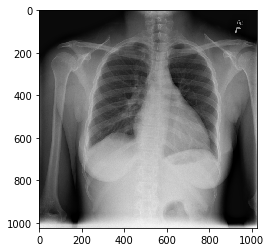

 69%|██████▉   | 69/100 [00:13<00:06,  4.98it/s]

0
Atelectasis                 0.339937
Consolidation               0.290752
Infiltration                0.511696
Pneumothorax                0.506280
Edema                       0.001728
Emphysema                   0.330257
Fibrosis                    0.503733
Effusion                    0.552308
Pneumonia                   0.001079
Pleural_Thickening          0.507136
Cardiomegaly                0.008416
Nodule                      0.288352
Mass                        0.503647
Hernia                      0.015285
Lung Lesion                 0.002511
Fracture                    0.232625
Lung Opacity                0.537416
Enlarged Cardiomediastinum  0.041361

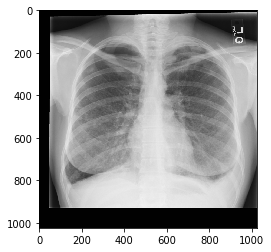

 70%|███████   | 70/100 [00:14<00:06,  4.86it/s]

0
Atelectasis                 0.589814
Consolidation               0.550235
Infiltration                0.507725
Pneumothorax                0.504792
Edema                       0.090867
Emphysema                   0.361124
Fibrosis                    0.521103
Effusion                    0.851490
Pneumonia                   0.198009
Pleural_Thickening          0.519899
Cardiomegaly                0.262073
Nodule                      0.534559
Mass                        0.587925
Hernia                      0.004583
Lung Lesion                 0.531727
Fracture                    0.305198
Lung Opacity                0.588324
Enlarged Cardiomediastinum  0.563933

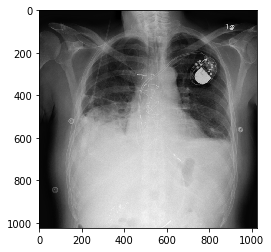

 71%|███████   | 71/100 [00:14<00:05,  4.91it/s]

0
Atelectasis                 0.176479
Consolidation               0.518594
Infiltration                0.552549
Pneumothorax                0.501067
Edema                       0.009399
Emphysema                   0.511146
Fibrosis                    0.504778
Effusion                    0.362450
Pneumonia                   0.042482
Pleural_Thickening          0.120548
Cardiomegaly                0.089248
Nodule                      0.521161
Mass                        0.916312
Hernia                      0.004263
Lung Lesion                 0.751216
Fracture                    0.117477
Lung Opacity                0.502921
Enlarged Cardiomediastinum  0.703084

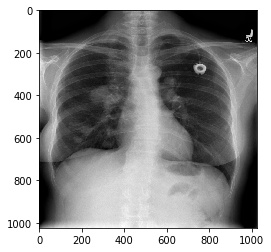

 72%|███████▏  | 72/100 [00:14<00:05,  4.96it/s]

0
Atelectasis                 0.513126
Consolidation               0.174209
Infiltration                0.523837
Pneumothorax                0.229252
Edema                       0.012588
Emphysema                   0.503110
Fibrosis                    0.514172
Effusion                    0.197471
Pneumonia                   0.036406
Pleural_Thickening          0.350372
Cardiomegaly                0.051703
Nodule                      0.579519
Mass                        0.565989
Hernia                      0.028205
Lung Lesion                 0.406761
Fracture                    0.524182
Lung Opacity                0.223528
Enlarged Cardiomediastinum  0.330123

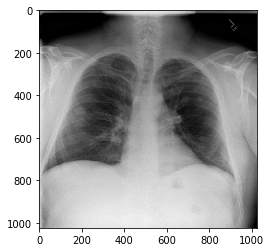

 73%|███████▎  | 73/100 [00:14<00:05,  4.97it/s]

0
Atelectasis                 0.047514
Consolidation               0.067258
Infiltration                0.516972
Pneumothorax                0.172029
Edema                       0.001398
Emphysema                   0.500696
Fibrosis                    0.502547
Effusion                    0.037182
Pneumonia                   0.007239
Pleural_Thickening          0.300788
Cardiomegaly                0.041083
Nodule                      0.337187
Mass                        0.225814
Hernia                      0.001826
Lung Lesion                 0.057839
Fracture                    0.165895
Lung Opacity                0.031517
Enlarged Cardiomediastinum  0.085577

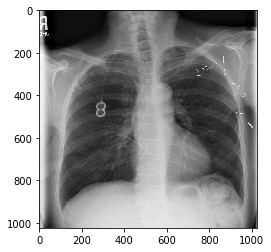

 74%|███████▍  | 74/100 [00:14<00:05,  4.53it/s]

0
Atelectasis                 0.053981
Consolidation               0.092103
Infiltration                0.518254
Pneumothorax                0.392696
Edema                       0.015754
Emphysema                   0.503101
Fibrosis                    0.508778
Effusion                    0.048836
Pneumonia                   0.037169
Pleural_Thickening          0.335403
Cardiomegaly                0.025061
Nodule                      0.477391
Mass                        0.222785
Hernia                      0.010401
Lung Lesion                 0.166513
Fracture                    0.360610
Lung Opacity                0.089051
Enlarged Cardiomediastinum  0.157403

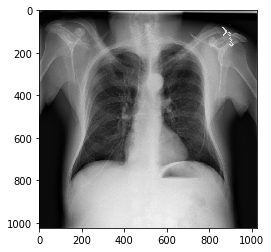

 75%|███████▌  | 75/100 [00:15<00:05,  4.64it/s]

0
Atelectasis                 0.508502
Consolidation               0.538834
Infiltration                0.515559
Pneumothorax                0.510302
Edema                       0.012423
Emphysema                   0.503972
Fibrosis                    0.508031
Effusion                    0.689224
Pneumonia                   0.043503
Pleural_Thickening          0.507956
Cardiomegaly                0.057728
Nodule                      0.510780
Mass                        0.876770
Hernia                      0.002909
Lung Lesion                 0.721216
Fracture                    0.105928
Lung Opacity                0.603399
Enlarged Cardiomediastinum  0.800540

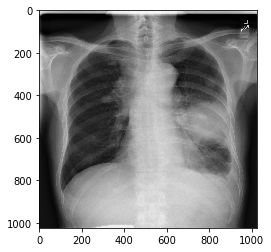

 76%|███████▌  | 76/100 [00:15<00:05,  4.76it/s]

0
Atelectasis                 0.543520
Consolidation               0.429529
Infiltration                0.537029
Pneumothorax                0.502826
Edema                       0.009633
Emphysema                   0.073273
Fibrosis                    0.513881
Effusion                    0.526950
Pneumonia                   0.029172
Pleural_Thickening          0.510062
Cardiomegaly                0.488500
Nodule                      0.284581
Mass                        0.523544
Hernia                      0.262628
Lung Lesion                 0.025129
Fracture                    0.229845
Lung Opacity                0.509035
Enlarged Cardiomediastinum  0.405780

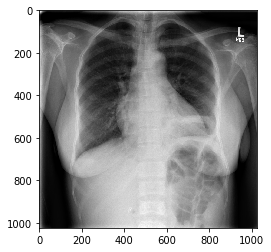

 77%|███████▋  | 77/100 [00:15<00:04,  4.76it/s]

0
Atelectasis                 0.677184
Consolidation               0.555793
Infiltration                0.586353
Pneumothorax                0.531034
Edema                       0.500036
Emphysema                   0.508066
Fibrosis                    0.644310
Effusion                    0.748670
Pneumonia                   0.177317
Pleural_Thickening          0.601626
Cardiomegaly                0.335224
Nodule                      0.526019
Mass                        0.599250
Hernia                      0.030781
Lung Lesion                 0.526644
Fracture                    0.527242
Lung Opacity                0.739453
Enlarged Cardiomediastinum  0.589940

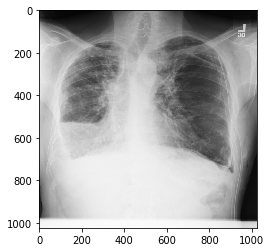

 78%|███████▊  | 78/100 [00:15<00:04,  4.85it/s]

0
Atelectasis                 0.119641
Consolidation               0.187323
Infiltration                0.532983
Pneumothorax                0.501091
Edema                       0.007575
Emphysema                   0.510544
Fibrosis                    0.551322
Effusion                    0.088261
Pneumonia                   0.074791
Pleural_Thickening          0.514894
Cardiomegaly                0.018535
Nodule                      0.524812
Mass                        0.503317
Hernia                      0.041515
Lung Lesion                 0.424710
Fracture                    0.445212
Lung Opacity                0.219913
Enlarged Cardiomediastinum  0.335071

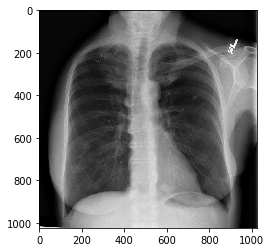

 79%|███████▉  | 79/100 [00:15<00:04,  4.92it/s]

0
Atelectasis                 0.487159
Consolidation               0.523741
Infiltration                0.551543
Pneumothorax                0.513381
Edema                       0.030923
Emphysema                   0.501812
Fibrosis                    0.571907
Effusion                    0.578367
Pneumonia                   0.080863
Pleural_Thickening          0.602644
Cardiomegaly                0.083773
Nodule                      0.522627
Mass                        0.572266
Hernia                      0.018849
Lung Lesion                 0.184242
Fracture                    0.498943
Lung Opacity                0.682941
Enlarged Cardiomediastinum  0.525995

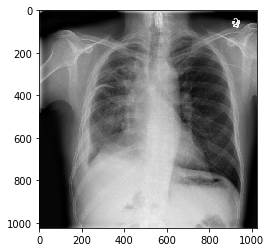

 80%|████████  | 80/100 [00:16<00:04,  4.98it/s]

0
Atelectasis                 0.554788
Consolidation               0.511810
Infiltration                0.579797
Pneumothorax                0.504929
Edema                       0.032307
Emphysema                   0.500253
Fibrosis                    0.567429
Effusion                    0.517855
Pneumonia                   0.107596
Pleural_Thickening          0.562171
Cardiomegaly                0.508281
Nodule                      0.522927
Mass                        0.537319
Hernia                      0.306520
Lung Lesion                 0.070192
Fracture                    0.503355
Lung Opacity                0.623005
Enlarged Cardiomediastinum  0.506653

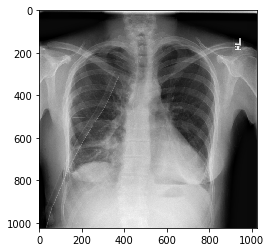

 81%|████████  | 81/100 [00:16<00:03,  5.06it/s]

0
Atelectasis                 0.577466
Consolidation               0.190097
Infiltration                0.541294
Pneumothorax                0.250235
Edema                       0.008582
Emphysema                   0.240601
Fibrosis                    0.573917
Effusion                    0.131427
Pneumonia                   0.042875
Pleural_Thickening          0.442900
Cardiomegaly                0.015019
Nodule                      0.502037
Mass                        0.274146
Hernia                      0.009616
Lung Lesion                 0.019672
Fracture                    0.472903
Lung Opacity                0.330143
Enlarged Cardiomediastinum  0.090836

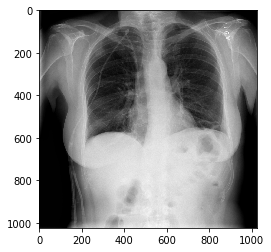

 82%|████████▏ | 82/100 [00:16<00:03,  5.01it/s]

0
Atelectasis                 0.565022
Consolidation               0.598838
Infiltration                0.648321
Pneumothorax                0.513882
Edema                       0.505007
Emphysema                   0.500533
Fibrosis                    0.515174
Effusion                    0.651107
Pneumonia                   0.584806
Pleural_Thickening          0.525111
Cardiomegaly                0.422672
Nodule                      0.523683
Mass                        0.641017
Hernia                      0.015184
Lung Lesion                 0.123844
Fracture                    0.391147
Lung Opacity                0.886382
Enlarged Cardiomediastinum  0.545481

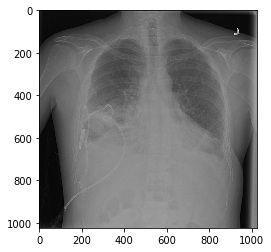

 83%|████████▎ | 83/100 [00:16<00:03,  5.03it/s]

0
Atelectasis                 0.477580
Consolidation               0.617152
Infiltration                0.794335
Pneumothorax                0.502970
Edema                       0.544502
Emphysema                   0.500117
Fibrosis                    0.560296
Effusion                    0.550208
Pneumonia                   0.721151
Pleural_Thickening          0.510139
Cardiomegaly                0.524813
Nodule                      0.619925
Mass                        0.602657
Hernia                      0.006013
Lung Lesion                 0.147745
Fracture                    0.231848
Lung Opacity                0.963099
Enlarged Cardiomediastinum  0.556452

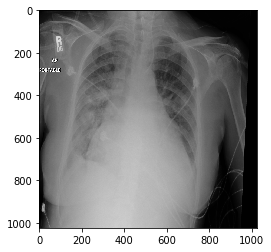

 84%|████████▍ | 84/100 [00:16<00:03,  5.06it/s]

0
Atelectasis                 0.508564
Consolidation               0.132759
Infiltration                0.522696
Pneumothorax                0.141075
Edema                       0.030660
Emphysema                   0.363850
Fibrosis                    0.507135
Effusion                    0.249243
Pneumonia                   0.023478
Pleural_Thickening          0.501261
Cardiomegaly                0.600188
Nodule                      0.467162
Mass                        0.394832
Hernia                      0.042478
Lung Lesion                 0.041677
Fracture                    0.500389
Lung Opacity                0.365210
Enlarged Cardiomediastinum  0.309760

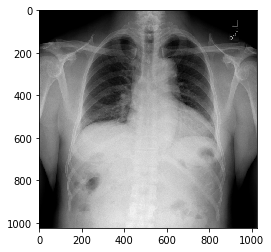

 85%|████████▌ | 85/100 [00:17<00:02,  5.03it/s]

0
Atelectasis                 0.425650
Consolidation               0.701869
Infiltration                0.862248
Pneumothorax                0.501195
Edema                       0.590319
Emphysema                   0.500974
Fibrosis                    0.512935
Effusion                    0.520508
Pneumonia                   0.994510
Pleural_Thickening          0.505014
Cardiomegaly                0.078761
Nodule                      0.553257
Mass                        0.564285
Hernia                      0.000048
Lung Lesion                 0.015060
Fracture                    0.059469
Lung Opacity                0.996541
Enlarged Cardiomediastinum  0.546446

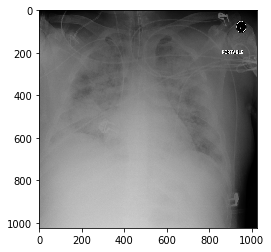

 86%|████████▌ | 86/100 [00:17<00:02,  5.01it/s]

0
Atelectasis                 0.516847
Consolidation               0.514988
Infiltration                0.518756
Pneumothorax                0.504151
Edema                       0.026755
Emphysema                   0.502811
Fibrosis                    0.533959
Effusion                    0.559297
Pneumonia                   0.009110
Pleural_Thickening          0.518286
Cardiomegaly                0.074032
Nodule                      0.580363
Mass                        0.834695
Hernia                      0.008719
Lung Lesion                 0.691275
Fracture                    0.512416
Lung Opacity                0.697002
Enlarged Cardiomediastinum  0.726282

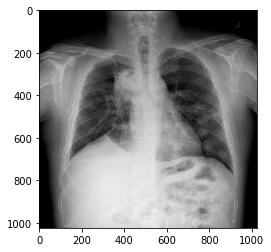

 87%|████████▋ | 87/100 [00:17<00:02,  5.01it/s]

0
Atelectasis                 0.452059
Consolidation               0.509763
Infiltration                0.396263
Pneumothorax                0.511900
Edema                       0.008456
Emphysema                   0.444258
Fibrosis                    0.506395
Effusion                    0.618235
Pneumonia                   0.057288
Pleural_Thickening          0.510798
Cardiomegaly                0.021978
Nodule                      0.541416
Mass                        0.719966
Hernia                      0.002915
Lung Lesion                 0.519484
Fracture                    0.274989
Lung Opacity                0.517083
Enlarged Cardiomediastinum  0.565666

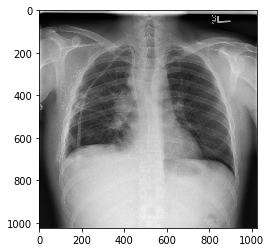

 88%|████████▊ | 88/100 [00:17<00:02,  4.99it/s]

0
Atelectasis                 0.372295
Consolidation               0.554952
Infiltration                0.528743
Pneumothorax                0.516207
Edema                       0.014217
Emphysema                   0.500062
Fibrosis                    0.507973
Effusion                    0.655052
Pneumonia                   0.016185
Pleural_Thickening          0.521335
Cardiomegaly                0.053474
Nodule                      0.524496
Mass                        0.828362
Hernia                      0.001134
Lung Lesion                 0.558810
Fracture                    0.188159
Lung Opacity                0.637002
Enlarged Cardiomediastinum  0.564553

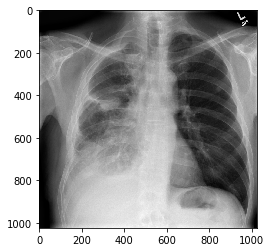

 89%|████████▉ | 89/100 [00:17<00:02,  4.98it/s]

0
Atelectasis                 0.568009
Consolidation               0.241774
Infiltration                0.560990
Pneumothorax                0.071622
Edema                       0.087291
Emphysema                   0.100776
Fibrosis                    0.517809
Effusion                    0.244474
Pneumonia                   0.036290
Pleural_Thickening          0.297898
Cardiomegaly                0.346477
Nodule                      0.500596
Mass                        0.469592
Hernia                      0.040782
Lung Lesion                 0.095014
Fracture                    0.316984
Lung Opacity                0.511032
Enlarged Cardiomediastinum  0.243272

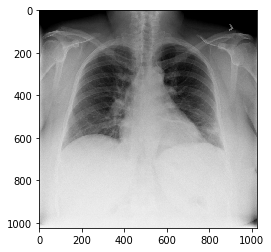

 90%|█████████ | 90/100 [00:18<00:01,  5.00it/s]

0
Atelectasis                 0.508173
Consolidation               0.556368
Infiltration                0.535203
Pneumothorax                0.501772
Edema                       0.009192
Emphysema                   0.343359
Fibrosis                    0.537699
Effusion                    0.521721
Pneumonia                   0.037174
Pleural_Thickening          0.514477
Cardiomegaly                0.047293
Nodule                      0.508967
Mass                        0.735667
Hernia                      0.002171
Lung Lesion                 0.006287
Fracture                    0.138425
Lung Opacity                0.860876
Enlarged Cardiomediastinum  0.504060

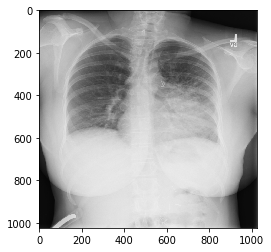

 91%|█████████ | 91/100 [00:18<00:01,  5.05it/s]

0
Atelectasis                 0.023007
Consolidation               0.141939
Infiltration                0.430009
Pneumothorax                0.505791
Edema                       0.003027
Emphysema                   0.146343
Fibrosis                    0.278995
Effusion                    0.061018
Pneumonia                   0.064590
Pleural_Thickening          0.115849
Cardiomegaly                0.023543
Nodule                      0.218935
Mass                        0.153661
Hernia                      0.002043
Lung Lesion                 0.040466
Fracture                    0.135018
Lung Opacity                0.066057
Enlarged Cardiomediastinum  0.161215

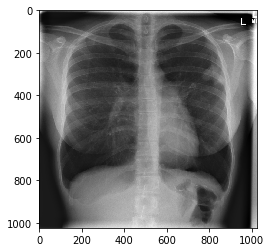

 92%|█████████▏| 92/100 [00:18<00:01,  5.01it/s]

0
Atelectasis                 0.569246
Consolidation               0.236058
Infiltration                0.529610
Pneumothorax                0.459264
Edema                       0.004874
Emphysema                   0.105281
Fibrosis                    0.550435
Effusion                    0.237446
Pneumonia                   0.016848
Pleural_Thickening          0.505150
Cardiomegaly                0.005444
Nodule                      0.500901
Mass                        0.453431
Hernia                      0.023108
Lung Lesion                 0.010036
Fracture                    0.506683
Lung Opacity                0.436527
Enlarged Cardiomediastinum  0.085067

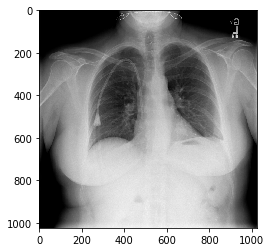

 93%|█████████▎| 93/100 [00:18<00:01,  4.99it/s]

0
Atelectasis                 0.529863
Consolidation               0.506555
Infiltration                0.538752
Pneumothorax                0.508155
Edema                       0.009534
Emphysema                   0.500164
Fibrosis                    0.531983
Effusion                    0.601280
Pneumonia                   0.002081
Pleural_Thickening          0.535833
Cardiomegaly                0.047457
Nodule                      0.534607
Mass                        0.658980
Hernia                      0.029952
Lung Lesion                 0.001195
Fracture                    0.522324
Lung Opacity                0.857676
Enlarged Cardiomediastinum  0.163148

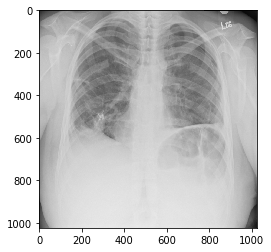

 94%|█████████▍| 94/100 [00:18<00:01,  4.94it/s]

0
Atelectasis                 0.577688
Consolidation               0.519006
Infiltration                0.522474
Pneumothorax                0.503323
Edema                       0.016299
Emphysema                   0.501008
Fibrosis                    0.565575
Effusion                    0.645328
Pneumonia                   0.041113
Pleural_Thickening          0.576761
Cardiomegaly                0.114665
Nodule                      0.517855
Mass                        0.547249
Hernia                      0.040071
Lung Lesion                 0.137885
Fracture                    0.522729
Lung Opacity                0.663186
Enlarged Cardiomediastinum  0.513583

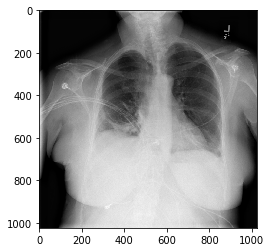

 95%|█████████▌| 95/100 [00:19<00:01,  4.98it/s]

0
Atelectasis                 0.527591
Consolidation               0.530232
Infiltration                0.576683
Pneumothorax                0.515376
Edema                       0.262745
Emphysema                   0.513755
Fibrosis                    0.561831
Effusion                    0.531556
Pneumonia                   0.363050
Pleural_Thickening          0.556815
Cardiomegaly                0.121542
Nodule                      0.568469
Mass                        0.768595
Hernia                      0.042802
Lung Lesion                 0.505408
Fracture                    0.513464
Lung Opacity                0.732610
Enlarged Cardiomediastinum  0.584449

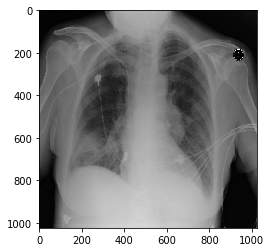

 96%|█████████▌| 96/100 [00:19<00:00,  5.01it/s]

0
Atelectasis                 0.536099
Consolidation               0.514452
Infiltration                0.563567
Pneumothorax                0.506069
Edema                       0.024325
Emphysema                   0.210281
Fibrosis                    0.504106
Effusion                    0.504417
Pneumonia                   0.017723
Pleural_Thickening          0.528607
Cardiomegaly                0.056396
Nodule                      0.505430
Mass                        0.568419
Hernia                      0.126083
Lung Lesion                 0.059902
Fracture                    0.508369
Lung Opacity                0.688111
Enlarged Cardiomediastinum  0.519699

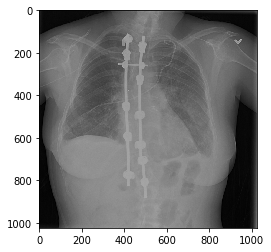

 97%|█████████▋| 97/100 [00:19<00:00,  5.01it/s]

0
Atelectasis                 0.737979
Consolidation               0.586190
Infiltration                0.513932
Pneumothorax                0.538781
Edema                       0.258895
Emphysema                   0.223971
Fibrosis                    0.505511
Effusion                    0.860759
Pneumonia                   0.207763
Pleural_Thickening          0.526744
Cardiomegaly                0.649318
Nodule                      0.509835
Mass                        0.523776
Hernia                      0.065908
Lung Lesion                 0.514729
Fracture                    0.517559
Lung Opacity                0.653049
Enlarged Cardiomediastinum  0.603165

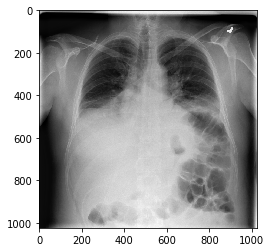

 98%|█████████▊| 98/100 [00:19<00:00,  4.52it/s]

0
Atelectasis                 0.325709
Consolidation               0.530475
Infiltration                0.596439
Pneumothorax                0.507690
Edema                       0.264061
Emphysema                   0.502068
Fibrosis                    0.585404
Effusion                    0.294758
Pneumonia                   0.543778
Pleural_Thickening          0.525330
Cardiomegaly                0.144011
Nodule                      0.547513
Mass                        0.525603
Hernia                      0.016155
Lung Lesion                 0.374053
Fracture                    0.363410
Lung Opacity                0.701573
Enlarged Cardiomediastinum  0.521397

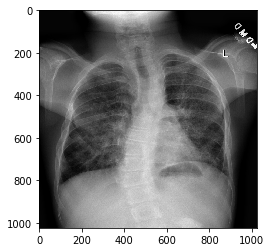

 99%|█████████▉| 99/100 [00:19<00:00,  4.65it/s]

0
Atelectasis                 0.475850
Consolidation               0.603226
Infiltration                0.641937
Pneumothorax                0.507030
Edema                       0.211888
Emphysema                   0.502045
Fibrosis                    0.609616
Effusion                    0.602898
Pneumonia                   0.101981
Pleural_Thickening          0.587247
Cardiomegaly                0.193960
Nodule                      0.652777
Mass                        0.746308
Hernia                      0.001958
Lung Lesion                 0.354747
Fracture                    0.511242
Lung Opacity                0.899737
Enlarged Cardiomediastinum  0.537323

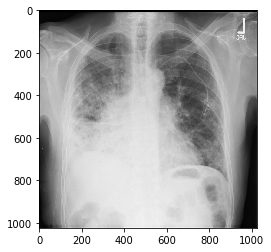

100%|██████████| 100/100 [00:20<00:00,  4.97it/s]


In [10]:
probs = {}
for image_file in tqdm(images):
    probs[osp.basename(image_file)] = get_probs(image_file, True)

In [12]:
df = pd.DataFrame.from_dict(probs, orient="index", columns=classes)

In [13]:
df["No Finding"] = 1 - df.max(axis=1)
df["No Finding Sum"] = -df.sum(axis=1)

In [29]:
df.to_csv("model_torchxray.csv")

In [15]:
expert_images = glob.glob("Dataset/Dataset/Expert/*")

In [27]:
df["fname"] = df.index.str.split(".").str[0]

In [28]:
df

Atelectasis  Consolidation  Infiltration  Pneumothorax  \
00000181_061.png     0.601702       0.531080      0.540291      0.509805   
00013977_005.png     0.053810       0.086384      0.530510      0.226370   
00013685_000.png     0.612337       0.529613      0.561089      0.504462   
00000808_002.png     0.648267       0.523385      0.547714      0.507168   
00018063_000.png     0.067089       0.547722      0.590236      0.502332   
...                       ...            ...           ...           ...   
00010447_018.png     0.527591       0.530232      0.576683      0.515376   
00007034_016.png     0.536099       0.514452      0.563567      0.506069   
00008814_010.png     0.737979       0.586190      0.513932      0.538781   
00002711_000.png     0.325709       0.530475      0.596439      0.507690   
00014251_029.png     0.475850       0.603226      0.641937      0.507030   

                     Edema  Emphysema  Fibrosis  Effusion  Pneumonia  \
00000181_061.png  0.503149   0.501667  0.527584  0.578379   0.553653   
00013977_005.png  0.001251   0.507218  0.504212  0.060457   0.004246   
00013685_000.png  0.030729   0.244470  0.542298  0.737246   0.147968   
00000808_002.png  0.156451   0.500513  0.521009  0.757632   0.246612   
00018063_000.png  0.006326   0.096758  0.501741  0.156877   0.139085   
...                    ...        ...       ...       ...        ...   
00010447_018.png  0.262745   0.513755  0.561831  0.531556   0.363050   
00007034_016.png  0.024325   0.210281  0.504106  0.504417   0.017723   
00008814_010.png  0.258895   0.223971  0.505511  0.860759   0.207763   
00002711_000.png  0.264061   0.502068  0.585404  0.294758   0.543778   
00014251_029.png  0.211888   0.502045  0.609616  0.602898   0.101981   

                  Pleural_Thickening  ...    Hernia  Lung Lesion  Fracture  \
00000181_061.png            0.550769  ...  0.012142     0.139100  0.523429   
00013977_005.png            0.170055  ...  0.014976     0.263935  0.111970   
00013685_000.png            0.537739  ...  0.168721     0.111475  0.501846   
00000808_002.png            0.547035  ...  0.206065     0.332735  0.520852   
00018063_000.png            0.220303  ...  0.000402     0.059236  0.126255   
...                              ...  ...       ...          ...       ...   
00010447_018.png            0.556815  ...  0.042802     0.505408  0.513464   
00007034_016.png            0.528607  ...  0.126083     0.059902  0.508369   
00008814_010.png            0.526744  ...  0.065908     0.514729  0.517559   
00002711_000.png            0.525330  ...  0.016155     0.374053  0.363410   
00014251_029.png            0.587247  ...  0.001958     0.354747  0.511242   

                  Lung Opacity  Enlarged Cardiomediastinum  No Finding  \
00000181_061.png      0.593831                    0.530269    0.398298   
00013977_005.png      0.065350                    0.386314    0.415503   
00013685_000.png      0.693447                    0.505813    0.262754   
00000808_002.png      0.536535                    0.518481    0.242368   
00018063_000.png      0.740057                    0.310480    0.259943   
...                        ...                         ...         ...   
00010447_018.png      0.732610                    0.584449    0.231405   
00007034_016.png      0.688111                    0.519699    0.311889   
00008814_010.png      0.653049                    0.603165    0.139241   
00002711_000.png      0.701573                    0.521397    0.298427   
00014251_029.png      0.899737                    0.537323    0.100263   

                  No Finding Sum    gt_sum  gt_sum_pos         fname  
00000181_061.png       -8.776658  15825045           1  00000181_061  
00013977_005.png       -4.553343  12200220           1  00013977_005  
00013685_000.png       -7.950518   5552370           1  00013685_000  
00000808_002.png       -8.889289   5347860           1  00000808_002  
00018063_000.png       -5.401562         0           0  000

In [17]:
res = {}
for expert_image in expert_images:
    image = imread(expert_image)
    image_sum = image.sum()
    res["_".join(osp.basename(expert_image).split(".")[0].split("_")[:-1]) + ".png"] = image_sum

In [18]:
df["gt_sum"] = df.index.map(res)
df["gt_sum_pos"] = np.where(df["gt_sum"] > 0, 1, 0)

In [19]:
df.corrwith(df.gt_sum)

Atelectasis                   0.185800
Consolidation                 0.492465
Infiltration                  0.436132
Pneumothorax                  0.375299
Edema                         0.416489
Emphysema                     0.318178
Fibrosis                      0.322180
Effusion                      0.292647
Pneumonia                     0.390110
Pleural_Thickening            0.316271
Cardiomegaly                  0.131936
Nodule                        0.329714
Mass                          0.410426
Hernia                       -0.121029
Lung Lesion                   0.216845
Fracture                      0.058559
Lung Opacity                  0.580783
Enlarged Cardiomediastinum    0.448064
No Finding                   -0.515112
No Finding Sum               -0.498029
gt_sum                        1.000000
gt_sum_pos                    0.347987
dtype: float64

In [21]:
1 - metrics.roc_auc_score(df.gt_sum_pos, df["No Finding Sum"])

0.9328449328449329

In [30]:
df_output = pd.read_csv("Dataset/Dataset/OpenPart.csv")

In [47]:
df_output["mean"] = df_output.mean(axis=1)

In [45]:
df = pd.merge(df, df_output, left_index=True, right_on="Case")

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [49]:
df.corrwith(df["mean"])

Atelectasis                  -0.199833
Consolidation                 0.129824
Infiltration                 -0.037299
Pneumothorax                  0.034926
Edema                        -0.114757
Emphysema                    -0.099023
Fibrosis                      0.215471
Effusion                     -0.070029
Pneumonia                     0.073597
Pleural_Thickening            0.071867
Cardiomegaly                 -0.325261
Nodule                        0.269228
Mass                          0.212338
Hernia                       -0.072482
Lung Lesion                   0.159681
Fracture                     -0.144233
Lung Opacity                  0.063615
Enlarged Cardiomediastinum    0.140395
No Finding                   -0.252832
No Finding Sum                0.012779
gt_sum                        0.184746
gt_sum_pos                   -0.023215
Sample 1                      0.670426
Sample 2                      0.674927
Sample 3                      0.748708
mean                     